# Chapter 2

This Jupyter notebook contains discussions and solutions for exercises for chapter 2.

In [1]:
from chap02 import *

### Problem 1
Use the rate given by equation 2.1 with $r_0=50 Hz$ and 

$$D(\tau)=−\cos\left(\frac{2\pi(\tau−20 ms)}{140 ms}\right)\exp(−\frac{\tau}{60 ms})Hz/ms$$

to predict the response of a neuron of the electrosensory lateral-line
lobe to a stimulus.  The above equation is an approximation for
the linear kernel obtained from the spike-triggered average shown
in figure 1.9. Use an approximate Gaussian white noise stimulus
constructed by choosing a stimulus value every 10 ms ($\Delta t=10$ ms)
from a Gaussian distribution with zero mean and variance $\frac{\sigma^2_s}{\Delta t}$,
with $\sigma^2_s=10$. Compute the firing rate over a 10 s period. From the
results, compute the firing rate-stimulus correlation function $Q_{rs}(\tau)$.
Using equation 2.6, compare $\frac{Q_{rs}(−\tau)}{\sigma^2_s}$ with the kernel $D(\tau)$ givenabove.

*****
Since the kernel has exponential decay, we assume (to speed up calculations) that its value for $\tau > 600$ ms is negligible, therefore, we integrate over the interval $\tau \in [0,600] ms$.




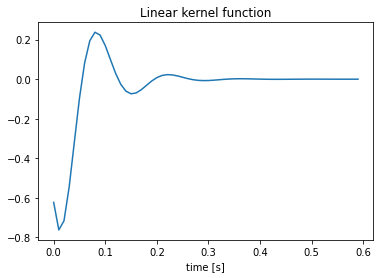

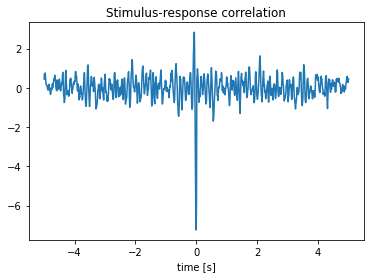

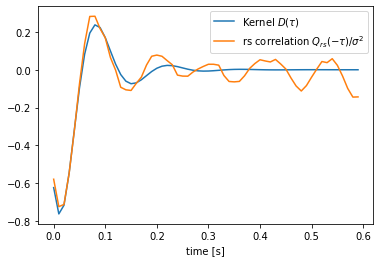

In [3]:
exercise1()

### Problem 2
MATLAB® file c1p8.mat contains the data described in exercise 8 ofchapter 1. Use the spike-triggered average (calculated in that exercise) to construct a linear kernel and use it in equation 2.1 to provide a model of the response of the H1 neuron. Choose $r_0$ so that the average firing rate predicted by the model in response to the stimulus used for the data matches the actual average firing rate. Use a Poisson generator with the computed rate to generate a synthetic spike train from this linear estimate of the firing rate in response to the stimulus `stim`. Plot examples of the actual and synthetic spike trains. How are they similar and how do they differ? Plot the autocorrelation function of the actual and the synthetic spike trains over the range 0 to 100 ms. Why is there a dip at a lag of 2 ms in the autocorrelation of the actual spike train? Is there a dip for the synthetic train too? Plot the interspike interval histogram for both spike trains. Why is there a dip below 6 ms in the histogram for the actual spike train? What are the coefficients of variation for the two spike trains and why might they differ? (Based on a problem from Sebastian Seung).

*****